In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/2_Wildfire_Analysis/3_Statistics/Input')
#Output = (''/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/2_Wildfire_Analysis/3_Statistics/Output')
cur_date = '010821'

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
#VSD_df <- data.frame(read_excel("010121_PeatSmolder_24h_Heat_VSD.xlsx"))
VSD_df = data.frame(read_excel('010821_PeatSmolder_24h_Heart_VSD_Hif1a.xlsx', sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(VSD_df)

,Gene,MH101_Saline,MH102_Saline,MH103_Saline,MH104_Saline,MH105_Saline,MH106_Saline,MH77_PeatSmolder,MH78_PeatSmolder,MH79_PeatSmolder,MH80_PeatSmolder,MH81_PeatSmolder,MH82_PeatSmolder
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Akt1,11.955144,12.332187,12.033441,12.053117,11.958400,11.950311,11.923279,11.876185,11.855127,12.007305,12.163909,12.041108
2,Akt1,9.533674,10.588191,10.219088,9.698560,10.122790,9.705852,9.562108,9.624924,9.715555,9.978346,9.816037,10.081852
3,Akt1,10.391407,10.753081,10.525747,10.378570,10.554185,10.274184,10.081849,10.273398,10.029140,10.100281,10.186886,10.211632
4,Camk1,11.456412,11.418455,11.070222,11.271588,10.705830,10.924141,10.745914,10.874624,10.610871,10.564993,10.657203,10.561107
5,Camk1,10.268802,10.033132,9.828338,9.973876,9.443886,9.736891,9.713026,9.628008,9.508602,9.420702,9.264654,9.548481
6,Camk1d,7.391308,6.980391,7.184439,7.110230,6.889347,7.218755,7.344204,7.214294,8.300921,7.830934,7.230521,7.299572


Visualizing data's distribution of each gene comparing VSD counts (with SVA) in unexposed (Saline) vs. exposed (Peat Smolder) samples by plotting box plots.

In [3]:
#changing column names to Saline or Peat Smolder
colnames(VSD_df)[2:6] = c('Saline')
colnames(VSD_df)[7:13] = c('Peat Smolder')
colnames(VSD_df)

[1] "Gene"         "Saline"       "Saline"       "Saline"       "Saline"      
 [6] "Saline"       "Peat Smolder" "Peat Smolder" "Peat Smolder" "Peat Smolder"
[11] "Peat Smolder" "Peat Smolder" "Peat Smolder"

In [4]:
#need to melt df to allow for easier visualization with ggplot
melted_VSD_df = melt(VSD_df, variable = 'Treatment', value.name = 'VSD')
head(melted_VSD_df)

Using Gene as id variables



,Gene,Treatment,VSD
,<chr>,<fct>,<dbl>
1,Akt1,Saline,11.955144
2,Akt1,Saline,9.533674
3,Akt1,Saline,10.391407
4,Camk1,Saline,11.456412
5,Camk1,Saline,10.268802
6,Camk1d,Saline,7.391308


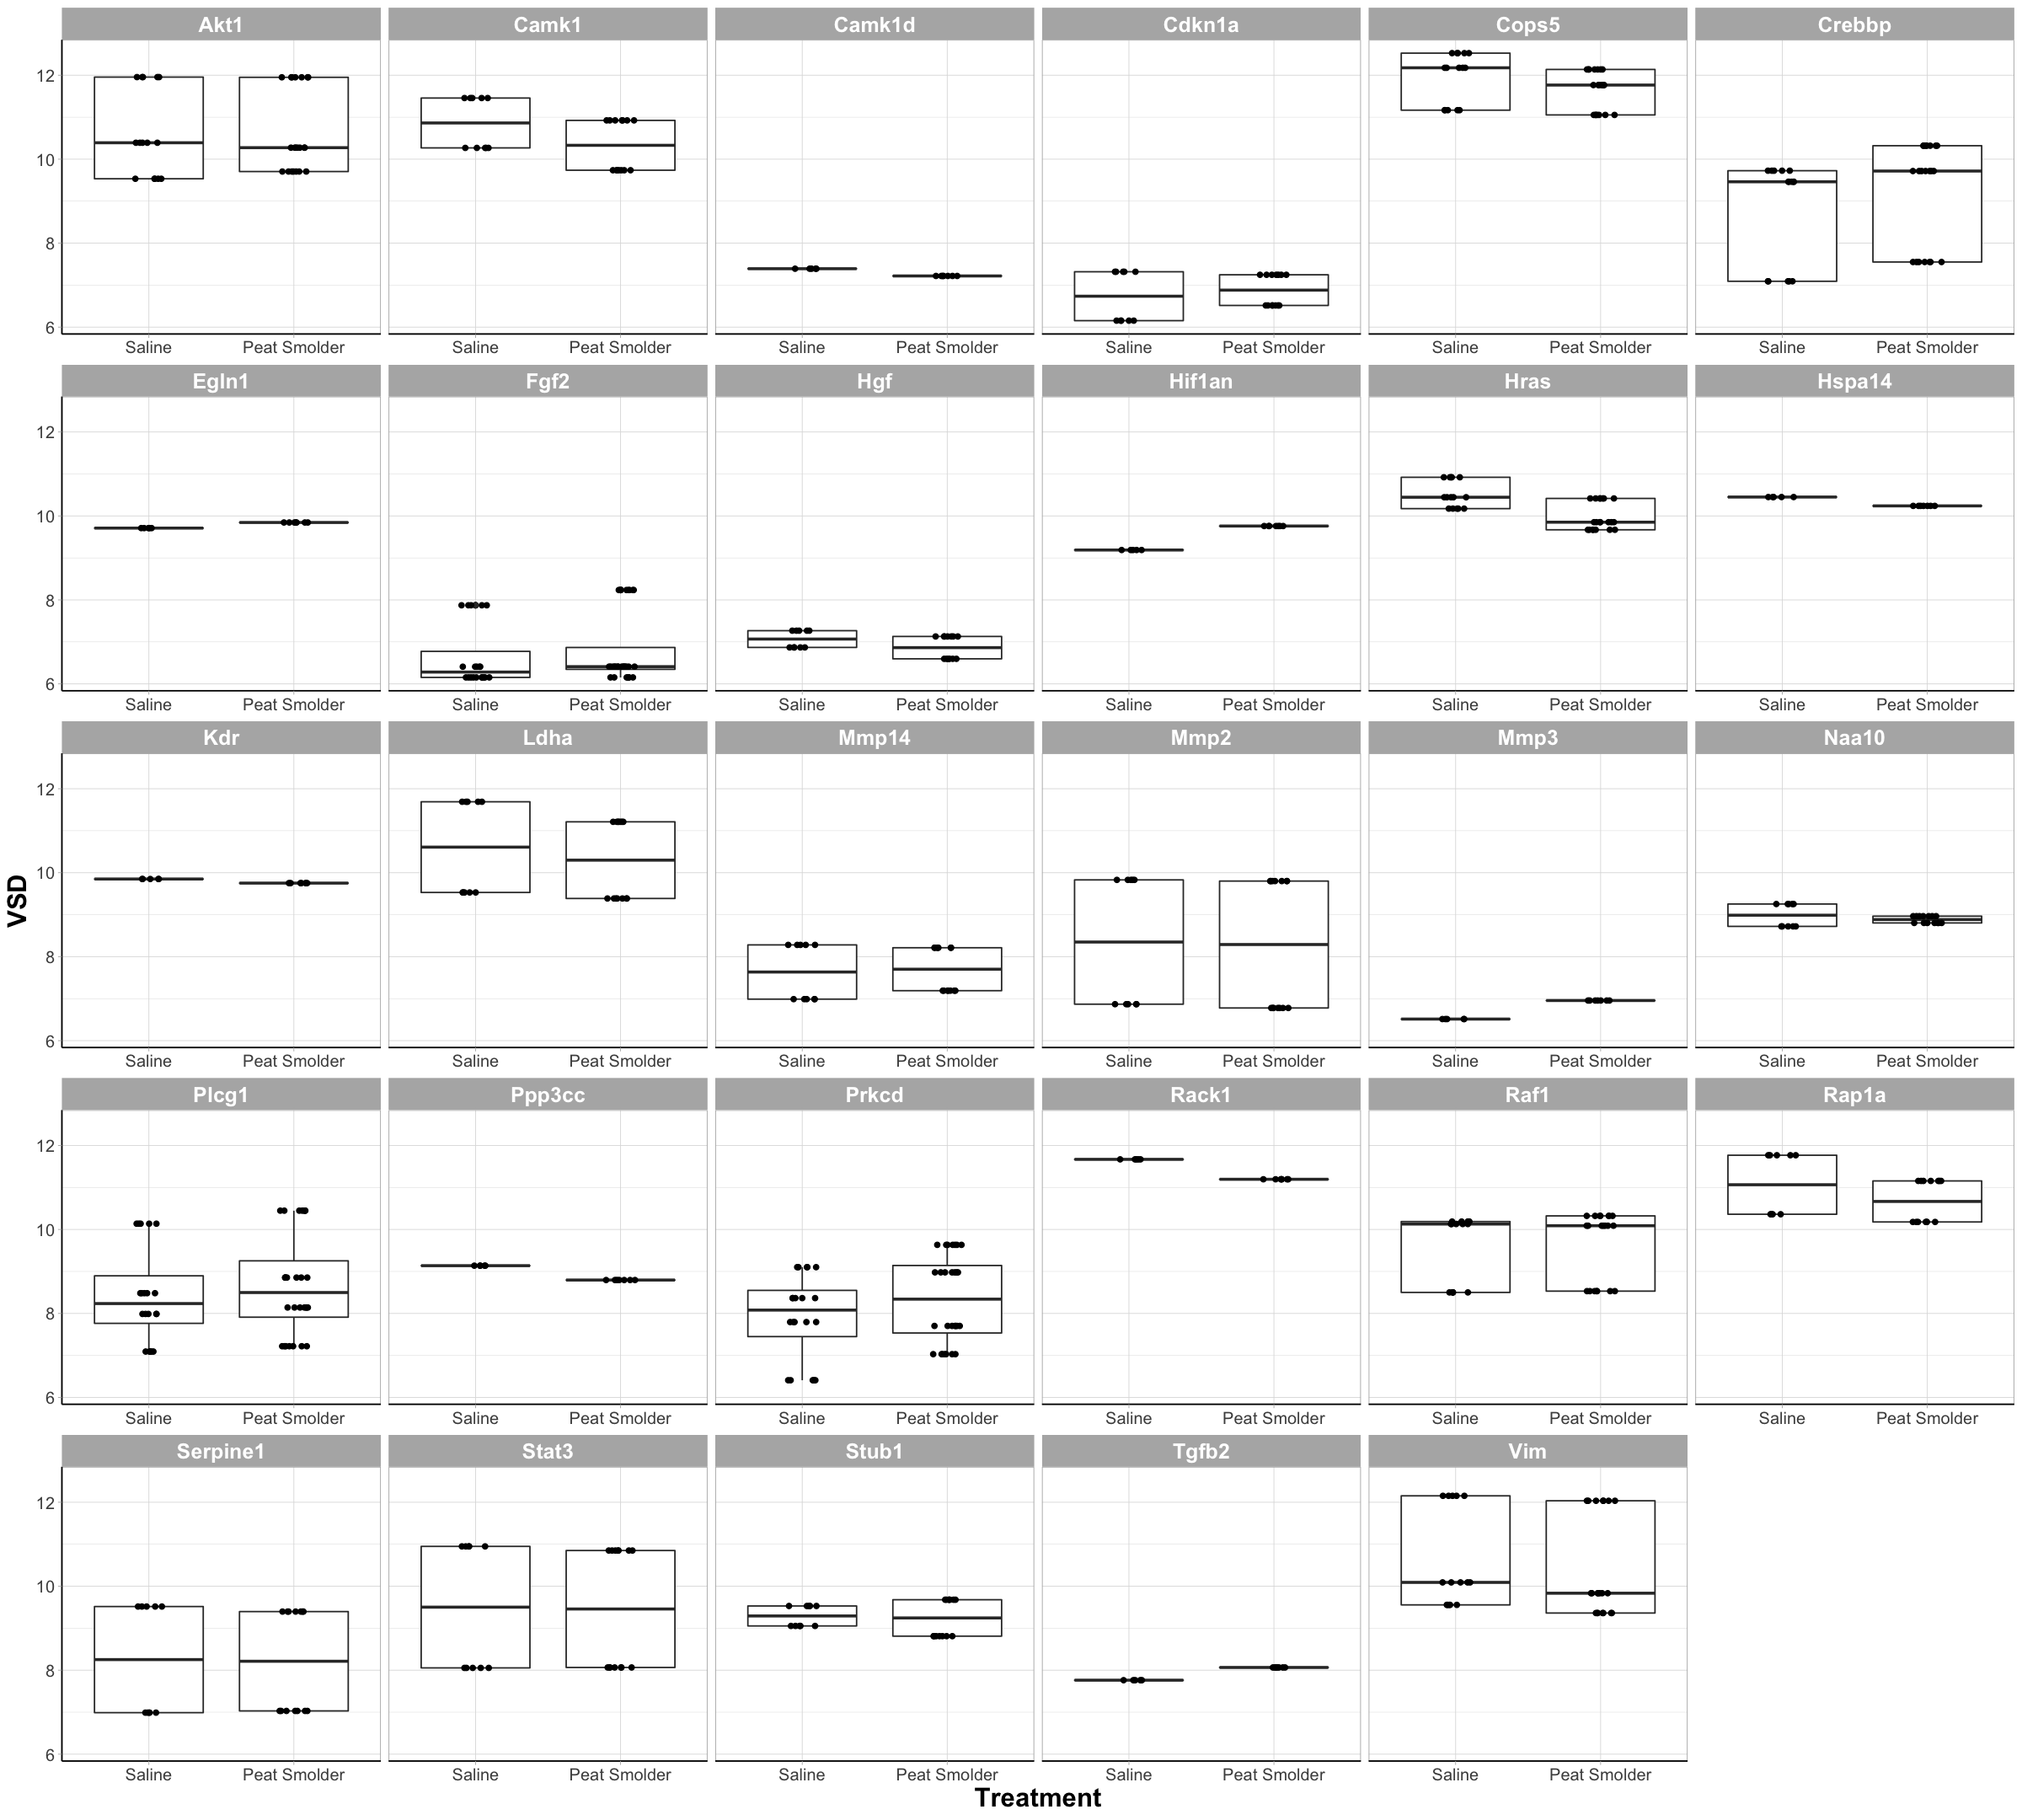

In [5]:
options(repr.plot.width= 20, repr.plot.height= 18) #changing size
ggplot(data = melted_VSD_df, aes(x = Treatment, y = VSD)) + 
  geom_boxplot() + 
  geom_point(position = position_jitter(h = 0, w = 0.1)) +
  facet_wrap(~Gene, scales = 'free_x') +

  theme_light() + 

  theme(legend.position = "none", #removing legend
        axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold"))  #changes size of facet y axis 